In [30]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
import matplotlib.cm as cm

paths=["./../BruteForce/","./../PKDTree/"]
fileNames=["DLAhost_snap49_r1_b1 (copy)","DLAhost_snap49_r1_b1alpha (copy)","DLAhost_snap49_r1_b1T10 (copy)"]
extend=["txt","txt","txt"]
techniques=["BF","PKDTree"]

setNum=1
threshold=np.power(10,0.2)  # for dataset with boxsize 150 and 2PC upto length boxsize/4
colors2=cm.rainbow(np.linspace(0, 1, len(fileNames)*len(techniques)))
eps=np.power(10,-5.0)

In [33]:
# The data structure to store complete correlation values found from all techniques is described in this comment
# masterData contains data in the form of list of techniques: masterData[]=[BF,PKDTree]
# Each item in masterData is itself a list having data from each file calculated using this technique ...
#... masterData[BF]=[file1,file2,file3]
# Each file data inside masterData is a dictionary in itself which contains the "bins" and "corrs" (correlation values)..
#... for that particular file. masterData[BF][file2]={'bins':[bin values],'corrs':[correlation values]}
# Each key in the file dictionary is itself a list of bin values and correlation values:...
#...masterData[BF][file2]['bins']=[b1,b2,b3...]

masterData=[]
for t in range(0,len(techniques)):
    techData=[]
    for i in range(0,len(fileNames)):
        fileData={}
        bins,corrs=[],[]
        fname=paths[t]+techniques[t]+" "+fileNames[i]+"."+extend[i]
        f=open(fname,'r')
        for line in f:
            if line[0]!='#':
                d=line.split()
                b=float(d[0])
                if b>=threshold:
                    bins.append(b)
                    corrs.append(float(d[1]))
        fileData['bins']=bins[:-1]
        fileData['corrs']=corrs[:-1]
        techData.append(fileData)
        f.close()
    masterData.append(techData)

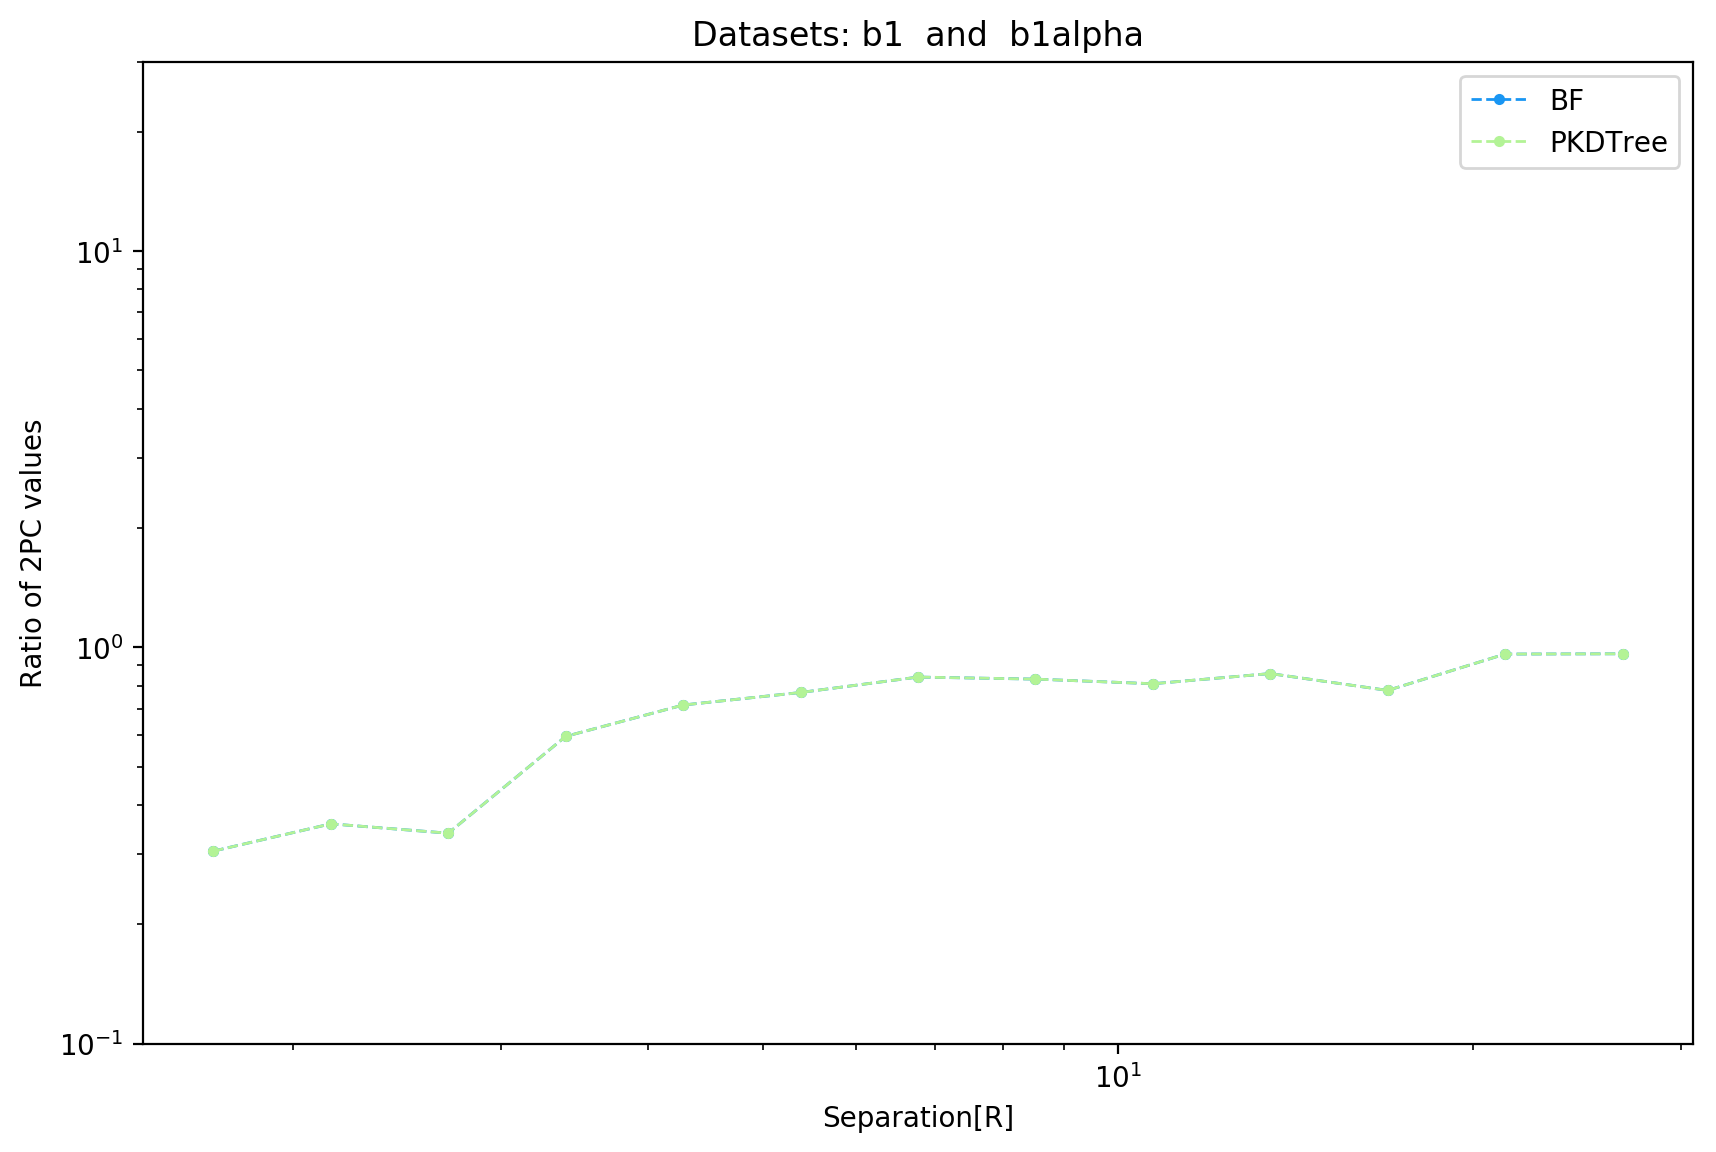

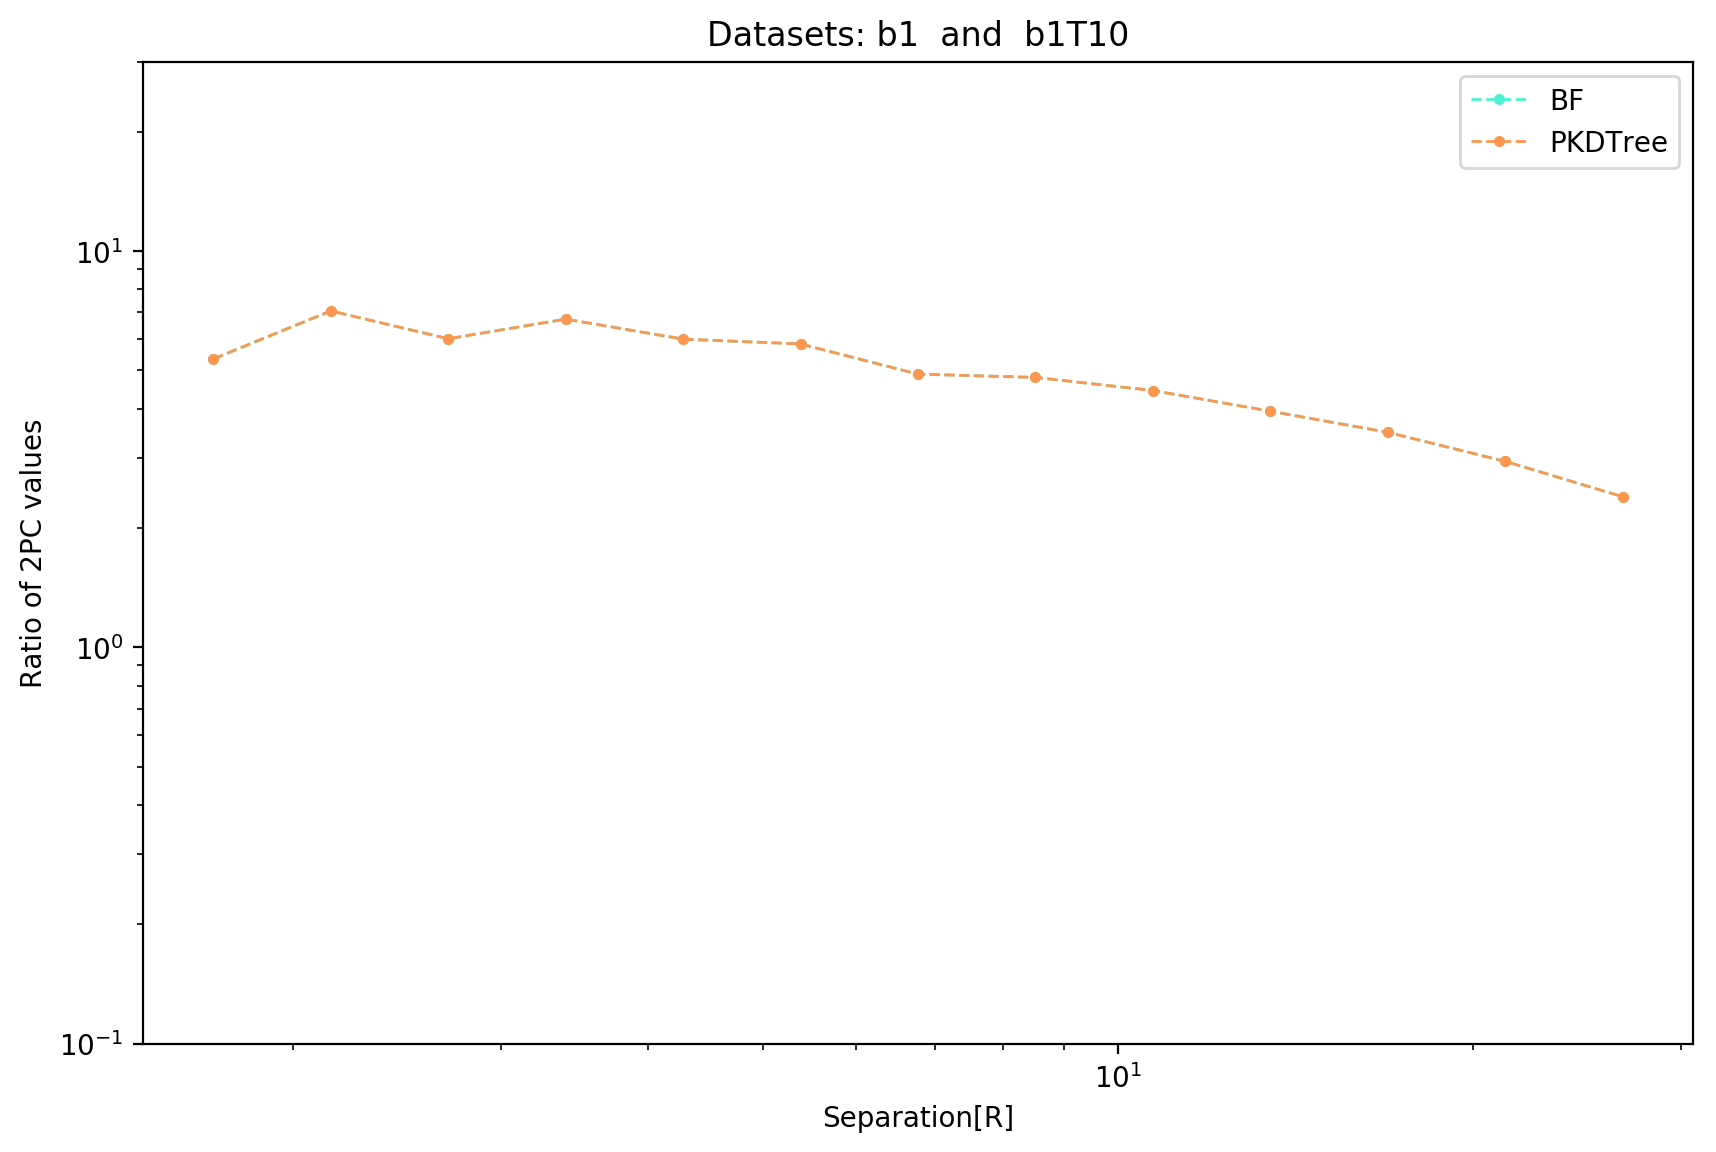

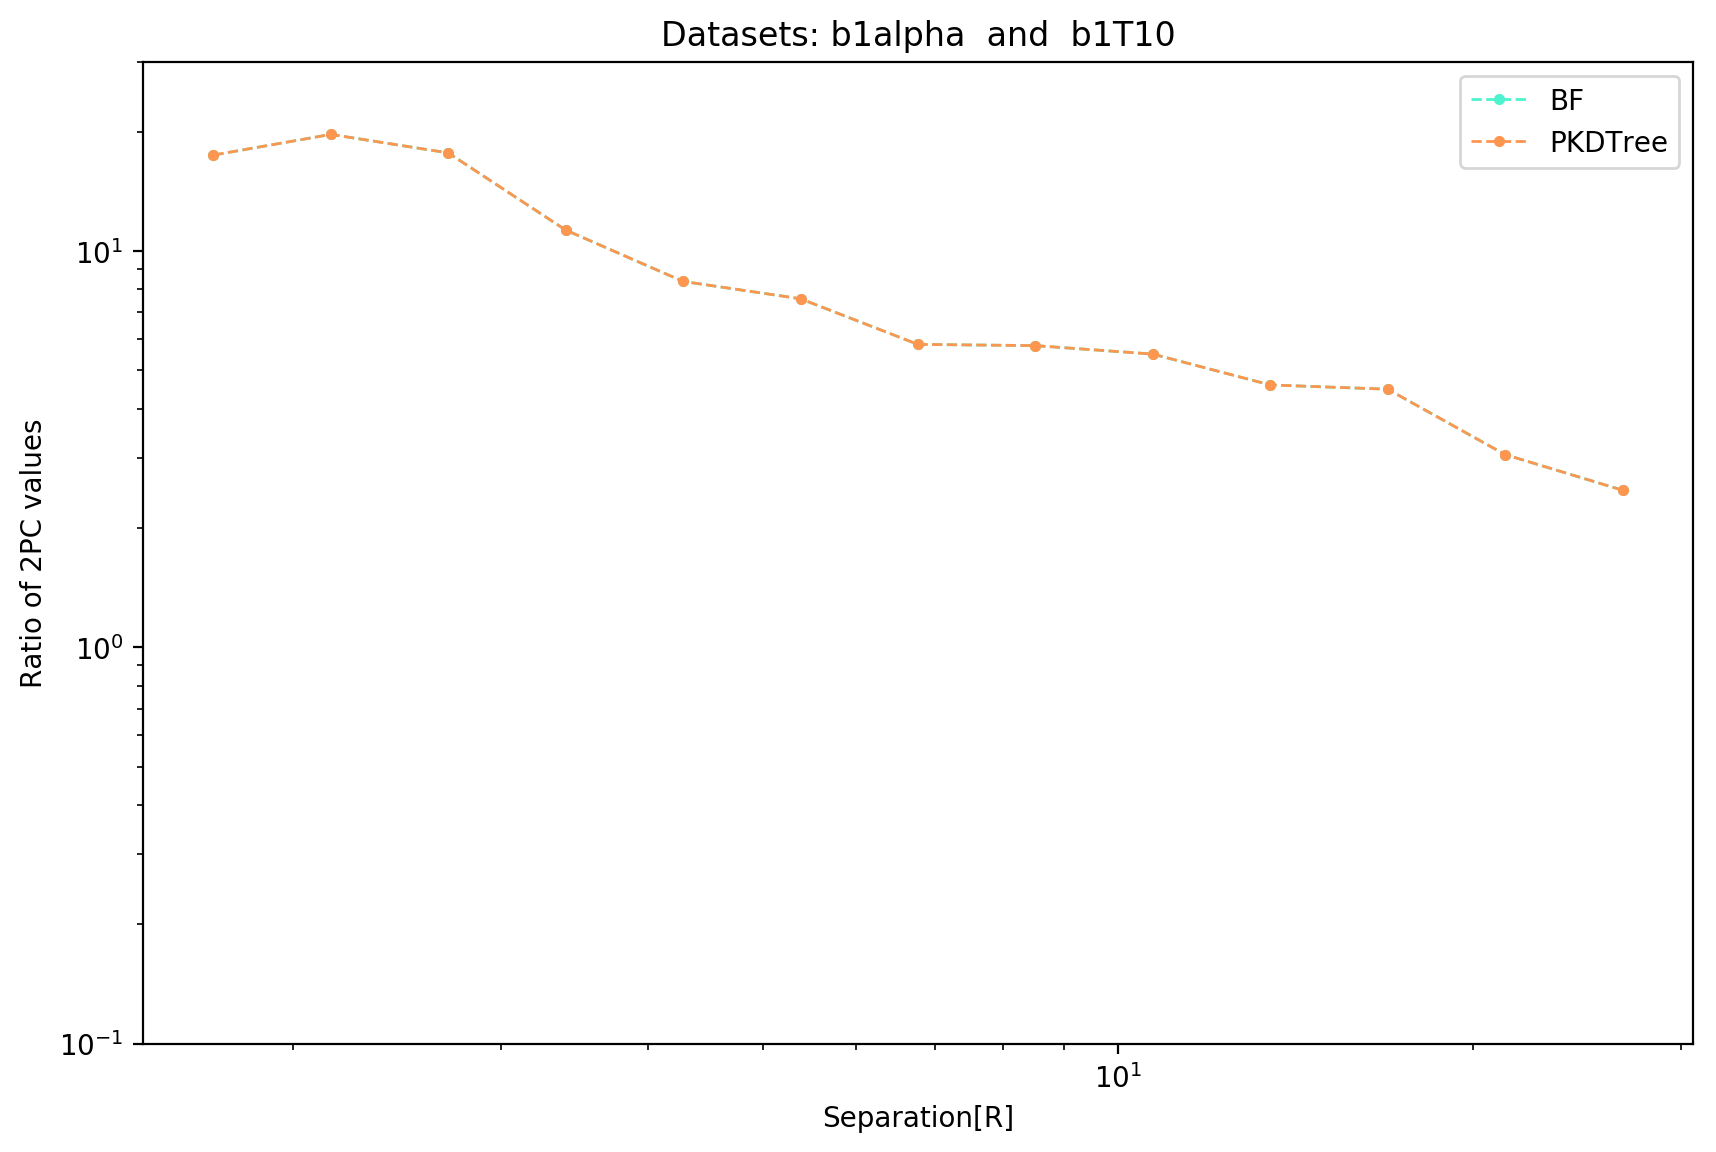

In [38]:
figureNum=1
for i in range(0,len(fileNames)-1):
    for j in range(i+1,len(fileNames)):
        plt.figure(figureNum,figsize=(10,6.5), dpi=200, facecolor='w', edgecolor='k')
        
        for t in range(0,len(techniques)):
            tData=masterData[t]
            corr_i=np.array(tData[i]['corrs'])
            corr_j=np.array(tData[j]['corrs'])
            corrRatio=(corr_i+eps)/(corr_j+eps)
            
            plt.plot(tData[i]['bins'],corrRatio,color=colors2[t*len(techniques)+j],marker='o',linestyle='dashed',linewidth=1,markersize=3,label=techniques[t])
        
        plt.legend()
        plt.title("Datasets: "+fileNames[i][18:-7]+"  and  "+fileNames[j][18:-7])
        plt.xlabel("Separation[R]")
        plt.ylabel("Ratio of 2PC values")
        plt.xscale("log")
        plt.yscale("log")
        plt.ylim(0.1,30)
        figureNum+=1
        plt.savefig('set'+str(setNum)+' '+fileNames[i][18:-7]+' & '+fileNames[j][18:-7]+'.png', bbox_inches='tight')